In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn.metrics import silhouette_score

er = pd.read_csv('winequality-red.csv') #read imported data
er.head()
print(er.head()) #to show the data

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

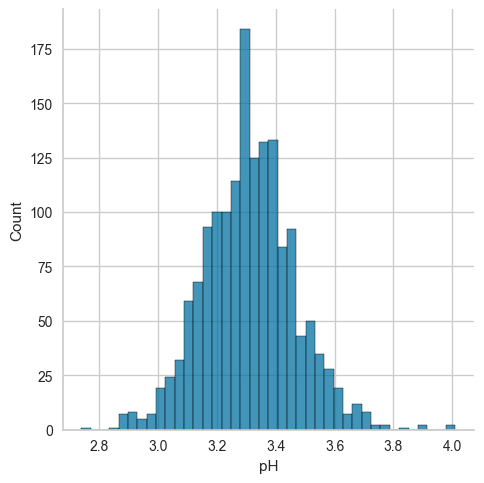

In [2]:
pH_Chart = sns.displot(er['pH']) #making chart of 'pH' data


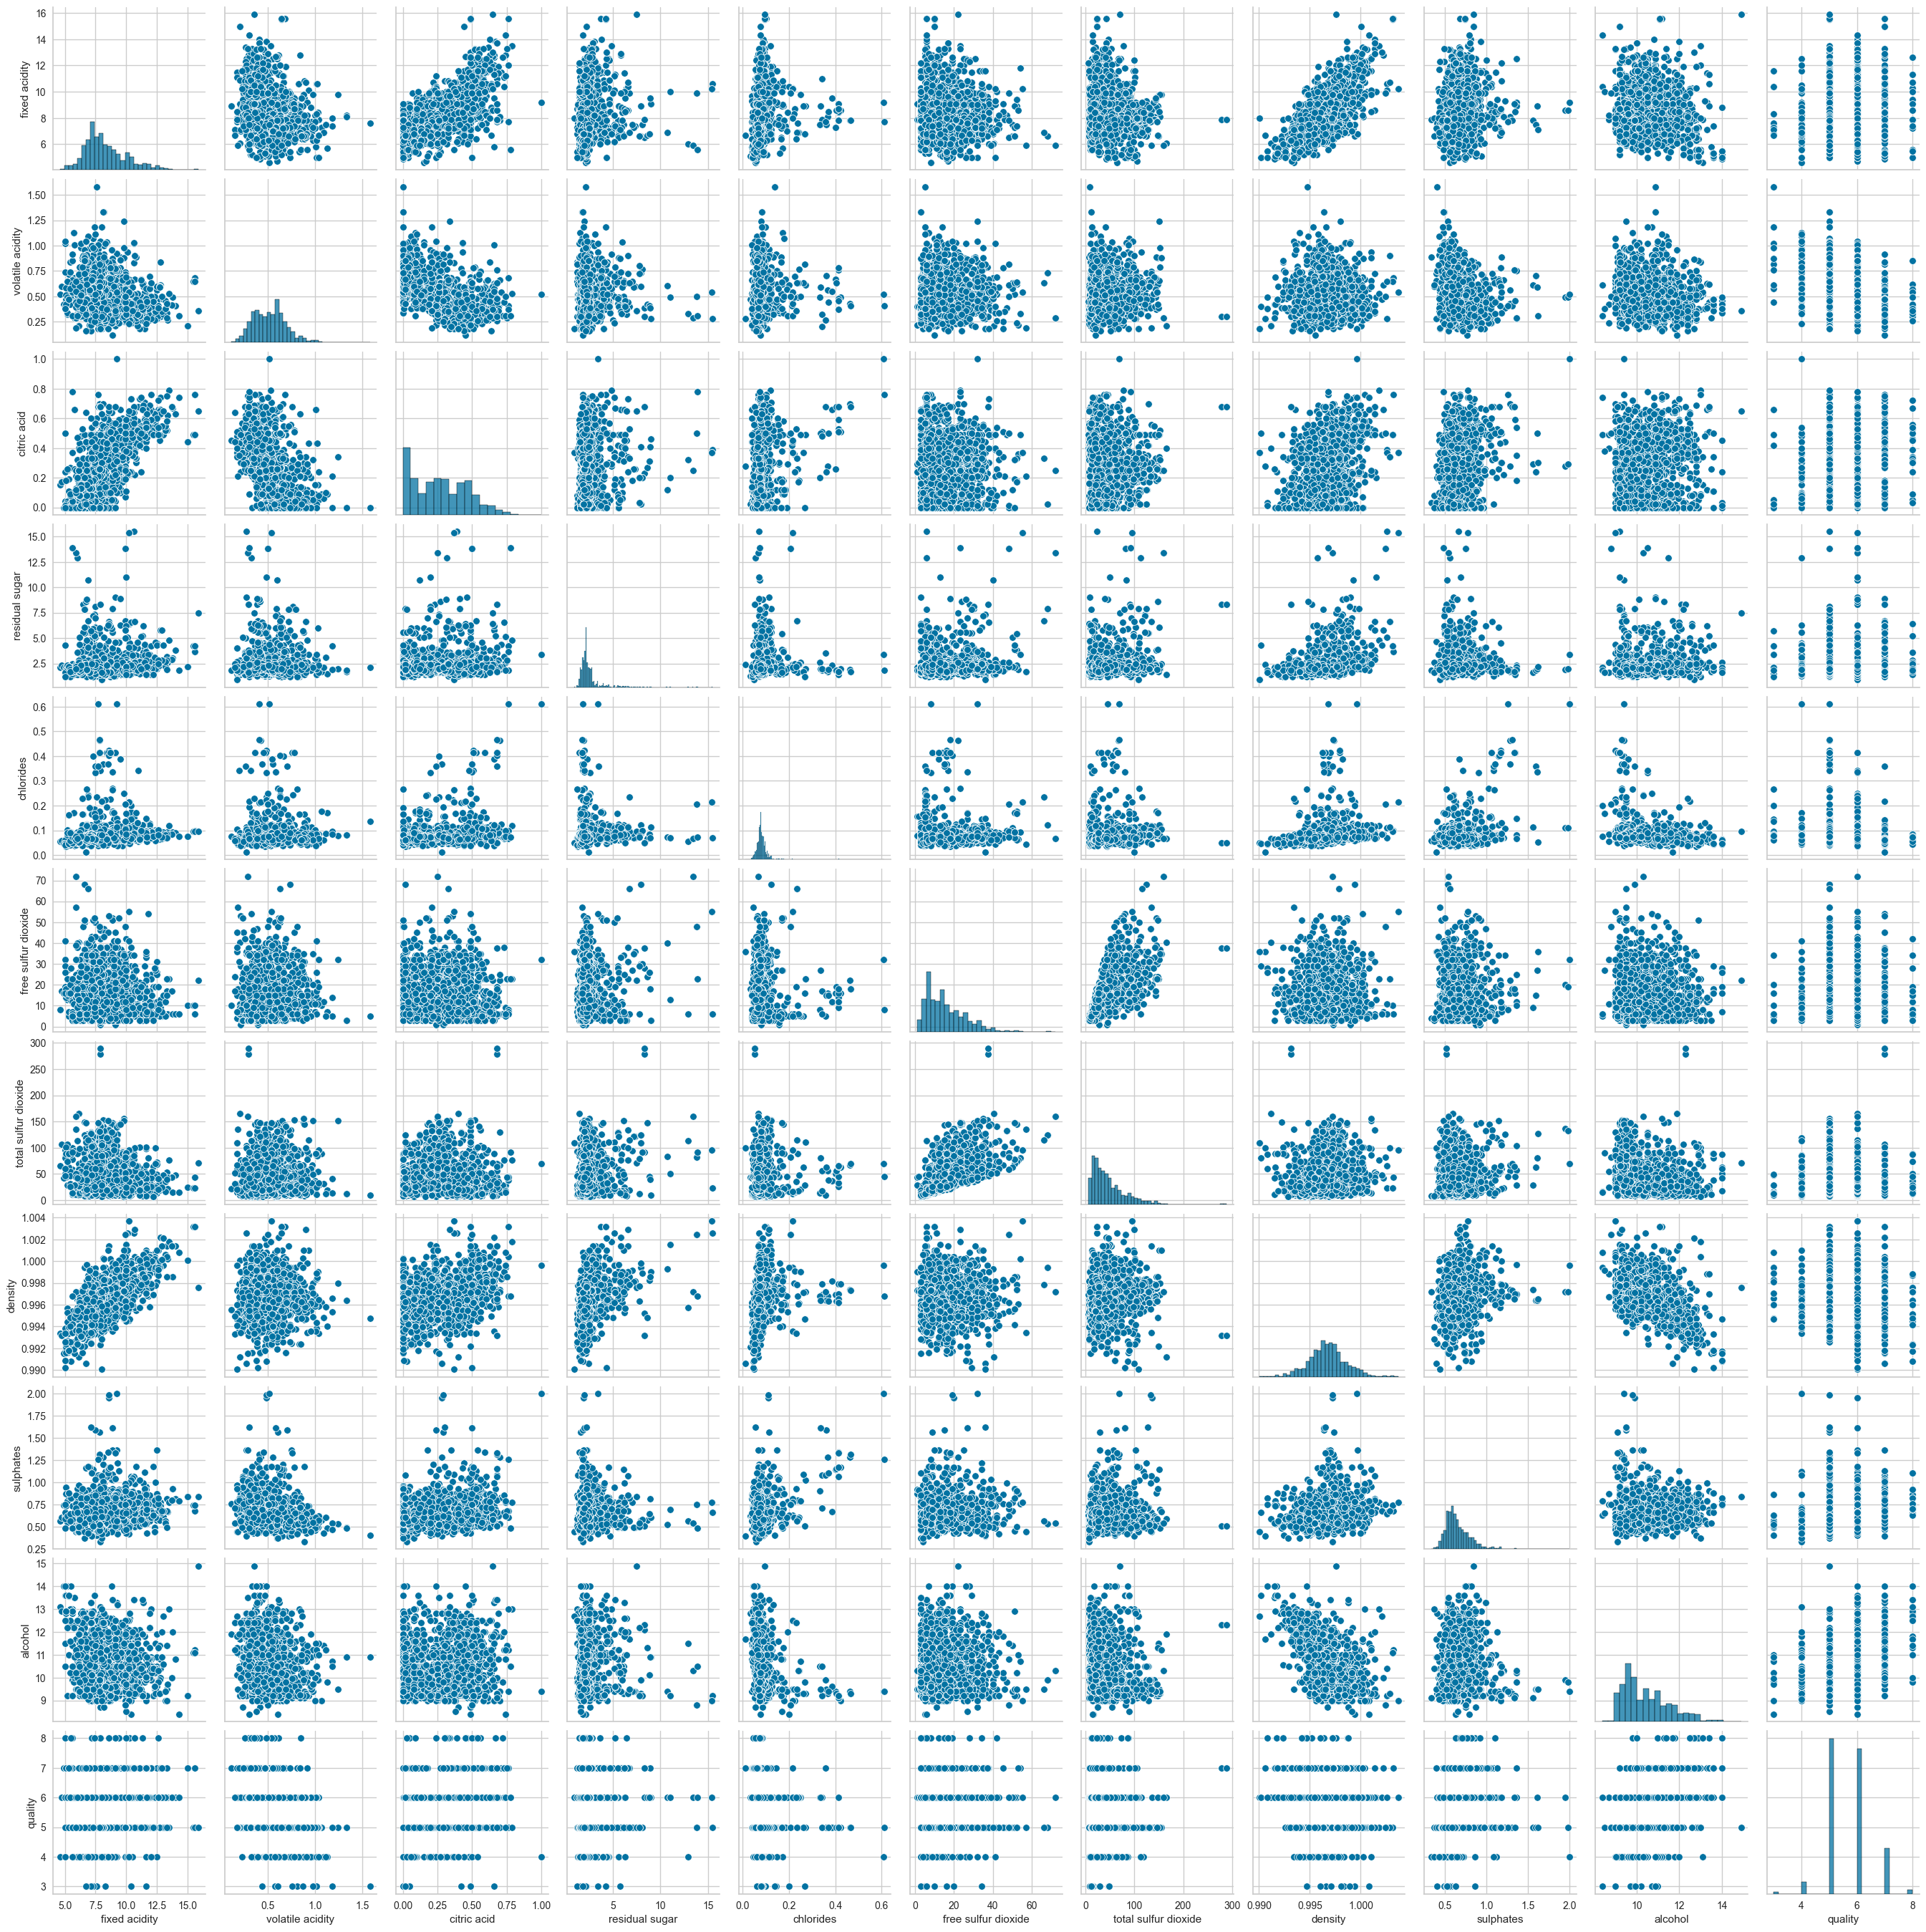

In [9]:
visualization = sns.pairplot(er)
plt.show()
print(visualization)

In [3]:
plt.figure(figsize = (13, 9))
#er = er.drop('alcohol', axis = 1)
er = er.drop('pH', axis = 1)
er.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Figure size 1300x900 with 0 Axes>

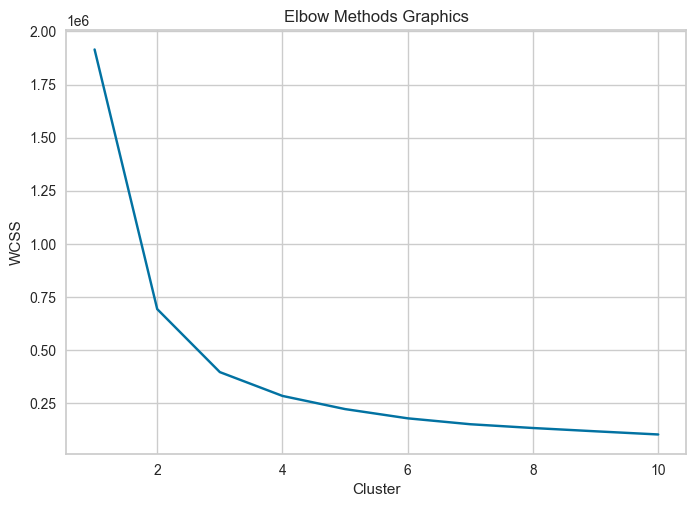

In [4]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(er)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Methods Graphics')
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()

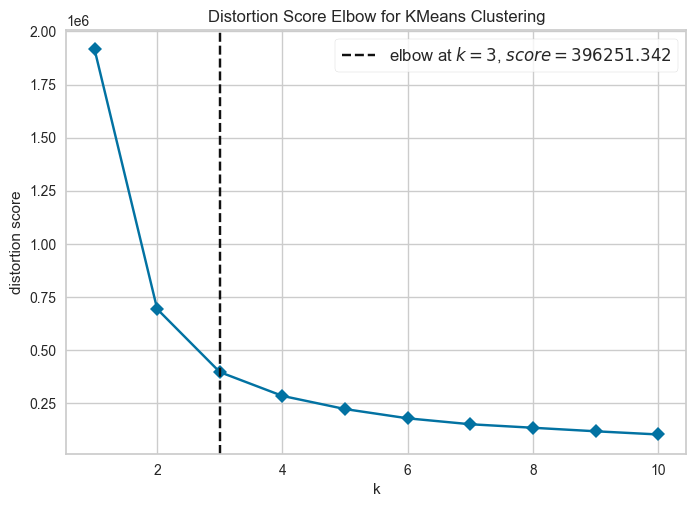

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
model = KMeans()
visible = KElbowVisualizer(model, k=(1,11), timings = False)
visible.fit(er)
visible.show()

In [8]:
#make silhouette score
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(er)
    SilhoutteScore = silhouette_score(er, kmeans.labels_, metric='euclidean')
    print("{} silhouette score : {}".format(i,SilhoutteScore))

2 silhouette score : 0.6028088405422896
3 silhouette score : 0.5184444805041948
4 silhouette score : 0.4842839344288024
5 silhouette score : 0.44506325947198866
6 silhouette score : 0.4463343623040335
7 silhouette score : 0.39075832935603205
8 silhouette score : 0.39330460677876156
9 silhouette score : 0.37569422299203736
10 silhouette score : 0.3802755754300371


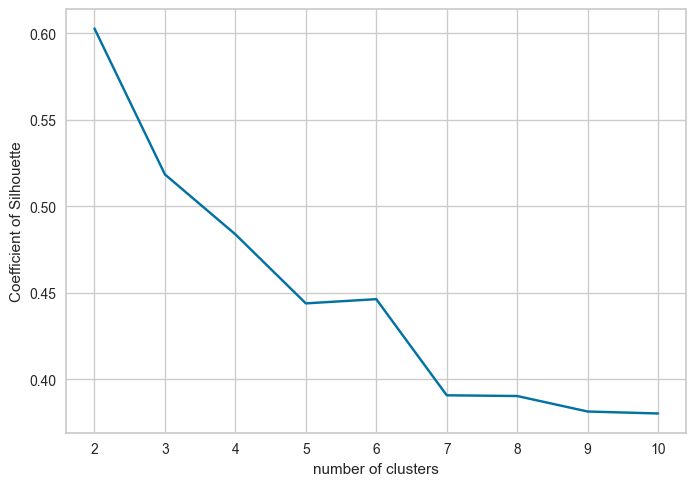

In [13]:
koefofsilhouette = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(er)
    SilhoutteScore = silhouette_score(er, kmeans.labels_)
    koefofsilhouette.append(SilhoutteScore)

plt.plot(range(2,11), koefofsilhouette)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("Coefficient of Silhouette")
plt.show()

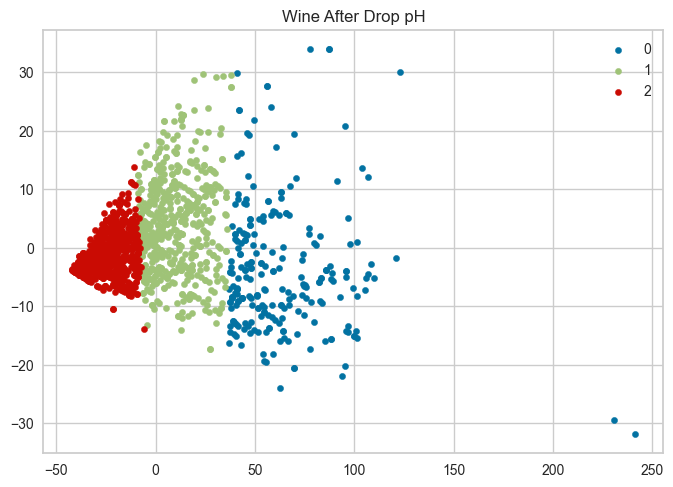

In [7]:
bca = PCA()
X = bca.fit_transform(er)
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
graphics = np.unique(label)

for i in graphics:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)
    
plt.legend()
plt.title('Wine After Drop pH')
plt.show()